In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Import Data

In [2]:
# netflix_titles
df1 = pd.read_csv('netflix_titles.csv')

df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [3]:
# netflix_titles_2
df2 = pd.read_csv('netflix_titles_2.csv')

df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
# netflix_titles_2
df3 = pd.read_csv('netflix_titles_3.csv')

df3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Step1: Conbine data

In [5]:
# as we want to figure out what characteristic may influence the popularity, columns like 'show_id' and 'title' are meaningless, so drop them to simplify the dataframe
df1 = df1.drop(columns = ['show_id', 'title'])
df2 = df2.drop(columns = ['show_id', 'title'])
df3 = df3.drop(columns = ['show_id', 'title'])

In [6]:
frames = [df1, df2, df3]
df0 = pd.concat(frames).drop_duplicates()

df0

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
5648,Movie,"Steve Hickner, Simon J. Smith","Jerry Seinfeld, Renée Zellweger, Matthew Brode...",United States,"January 1, 2017",2007,PG,92 min,"Children & Family Movies, Comedies","Barry, a worker bee stuck in a dead-end job ma..."
5794,Movie,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5851,Movie,"Felix Van Groeningen, Felix van Groeningen","Stef Aerts, Tom Vermeir, Charlotte Vandermeers...","Belgium, France, Netherlands","April 15, 2016",2016,TV-MA,127 min,"Dramas, International Movies",Two brothers become partners in a modest night...


In [7]:
#df0.fillna('None', inplace = True)
print(df0.shape)

(11072, 10)


### Step2: Look at data

In [8]:
# check the number of missing values in the dataframe
df0.isnull().sum()

type               0
director        3829
cast            1025
country         1083
date_added        11
release_year       0
rating            10
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

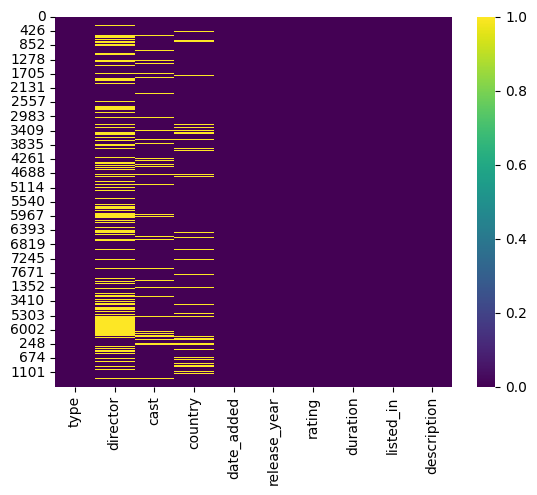

In [9]:
# more intuitively to look at missing data 
sns.heatmap(df0.isnull(), cmap = 'viridis')

### Step3: Deal with missing data

In [10]:
# There are too many missing values in the 'director' column, and this attribute is not that important for our analysis, so we decide to drop this column as well.
# Similarly, there are more than 5% of data with missing value in cast, so we drop it first. (If we have time, we will think about how to process it.)
df0 = df0.drop(columns = ['director', 'cast'])

df0.head()

,type,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
# replace all null values in 'country' with 'United States' as Netflix is based in U.S. and evry show is aired on Netflix U.S.
df0['country'].replace(np.nan, 'United States',inplace  = True)

In [12]:
# Similarly, we may replace the null values in 'rating' by the most popular rating

# figure out the most common rating
df0['rating'].value_counts()

rating
TV-MA       3819
TV-14       2846
TV-PG       1127
R            875
PG-13        541
TV-Y7        441
TV-Y         410
PG           331
TV-G         297
NR           218
TV-Y7-FV      95
G             49
UR             7
NC-17          3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [13]:
# replace the null values in 'rating'
df0['rating'].replace(np.nan, 'TV-MA',inplace  = True)

In [14]:
# drop rows of data with missing value in date_added
df0.dropna(subset=['date_added'], inplace=True)
df0

,type,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...
5648,Movie,United States,"January 1, 2017",2007,PG,92 min,"Children & Family Movies, Comedies","Barry, a worker bee stuck in a dead-end job ma..."
5794,Movie,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5851,Movie,"Belgium, France, Netherlands","April 15, 2016",2016,TV-MA,127 min,"Dramas, International Movies",Two brothers become partners in a modest night...


In [15]:
# check whether there are null values in the dataframe
df0.isnull().sum()

type            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

### Step4: Data Preprocessing

In [16]:
print(df0.dtypes)

type            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


#### (1) Transform "type" to binary variable

In [17]:
df0['type'] = df0['type'].map({'TV Show': 0, 'Movie': 1})

df0.head()

,type,country,date_added,release_year,rating,duration,listed_in,description
0,0,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,1,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,1,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,1,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### (2) Change data type of "date_added" and depart it into year, month and day

In [18]:
df0['date_added'] = df0['date_added'].str.strip()  # Remove leading and trailing spaces
df0['date_added'] = pd.to_datetime(df0['date_added'], format='%B %d, %Y')

# Extract the month and create a new column for it
# df0['added_year'] = df0['date_added'].dt.year
# df0['added_month'] = df0['date_added'].dt.month
# df0['added_day'] = df0['date_added'].dt.day

df0.head()

,type,country,date_added,release_year,rating,duration,listed_in,description
0,0,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,1,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,1,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,1,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### (3) Separate two kinds of "duration" and transform data type to int

In [19]:
# Convert 'duration' column to string type
df0['duration'] = df0['duration'].astype(str)

# Custom function to extract the first number from a string
def extract_number(s):
    try:
        # Extract the first number and return it
        return int(''.join(filter(str.isdigit, s.split()[0])))
    except (ValueError, IndexError):
        # Return -1 if there's any issue in extracting the number
        return -1

# Apply the custom function based on the type
df0['tv_show_season'] = df0.apply(lambda row: extract_number(row['duration']) if row['type'] == 0 else -1, axis=1)
df0['movie_minutes'] = df0.apply(lambda row: extract_number(row['duration']) if row['type'] == 1 else -1, axis=1)

df0 = df0.drop(columns = ['duration'])

df0

,type,country,date_added,release_year,rating,listed_in,description,tv_show_season,movie_minutes
0,0,Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,-1
1,1,Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,-1,93
2,1,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",-1,78
3,1,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",-1,80
4,1,United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become card-coun...,-1,123
...,...,...,...,...,...,...,...,...,...
5648,1,United States,2017-01-01,2007,PG,"Children & Family Movies, Comedies","Barry, a worker bee stuck in a dead-end job ma...",-1,92
5794,1,United States,2016-09-16,2010,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,-1,-1
5813,1,United States,2016-08-15,2015,66 min,Movies,The comic puts his trademark hilarious/thought...,-1,-1
5851,1,"Belgium, France, Netherlands",2016-04-15,2016,TV-MA,"Dramas, International Movies",Two brothers become partners in a modest night...,-1,127


#### (4) Map different value of rating into integer

In [20]:
# Use factorize to map the unique values to numbers
df0['rating_mapped'] = pd.factorize(df0['rating'])[0]

df0.head()

,type,country,date_added,release_year,rating,listed_in,description,tv_show_season,movie_minutes,rating_mapped
0,0,Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4,-1,0
1,1,Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,-1,93,0
2,1,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",-1,78,1
3,1,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",-1,80,2
4,1,United States,2020-01-01,2008,PG-13,Dramas,A brilliant group of students become card-coun...,-1,123,2


In [21]:
print(df0.dtypes)

type                       int64
country                   object
date_added        datetime64[ns]
release_year               int64
rating                    object
listed_in                 object
description               object
tv_show_season             int64
movie_minutes              int64
rating_mapped              int64
dtype: object


### Step5: Visualization

### Step6: Summary Statistics